<img src="files/img/pandas.png" alt="Operations Across Axes" />

# [Pandas](http://pandas.pydata.org/) - Python Data Analysis Library
---
## I shamelessly picked from these chaps:
 - [Daniel Chen - Pandas for Data Analysis](https://www.youtube.com/watch?v=oGzU688xCUs)
 - [Jeff Delaney - 19 Essential Snippets in Pandas](https://jeffdelaney.me/blog/useful-snippets-in-pandas/)
 - [Burke Squires - Intro to Data Analysis with Python](https://github.com/burkesquires/python_biologist/tree/master/05_python_data_analysis)


## General plan:
- what is Pandas all about?
- brief intro to pandas objects and syntax
- numpy dataframe, show the basics
- import gapminder dataset, interactive
---
### Things to show:
- start with building from numpy to a pandas dataframe
- import pandas as pd
- create dataframe (first from np.array)
- explore: head, tail, sample, shape, describe, info
- differentiate series (single vector) and dataframes (multiple vectors)
- change column names (lists)
- add/remove, and reorder a column (mean, conditional logic)
- add/remove and reorder a row (dictionary, key=col name)
- change value in row
- create a plot (matplotlib)
- combine two dataframes (create a new dataframe with same index as the first)
    - (axis=0 and axis=1)
- demonstrate .loc and .iloc
- reindex (change index number)
    
### Gapminder dataset: 
- how to import a (tab)-delimited file as a dataframe
- explore dataset
    - df.duplicate
    - df.unique
    - df.nunique

## Jupyter Notebook Shortcuts
- documentation: [mysterious_function]?
- check function arguments: shift + tab
- run current cell/block: shift + enter 
- insert cell above: esc + a
- delete cell: esc (hold) + d + d (double tap)

In [ ]:
type?

<img src="files/img/python-scientific-ecosystem.png" alt="Operations Across Axes" />

## What is Pandas?
- This is the go-to data analysis library for Python
- The non-clicky version of Excel
- Cousin of R
- Progeny of NumPy
- Best buds with Matplotlib
- Think in vector operations

## Pandas Objects and Syntax:
- DataFrame = Indexed rows and columns of data, like a spreadsheet or database table.
- Series = single column of data
- Shape: [number_of_rows, number_of_columns] in a DataFrame
- Axis: 
    - 0 == Calculate statistic for each column
    - 1 == Calculate statistic for each row
    - *reversed when using the drop() function to remove columns/rows
    
<img src="files/img/python-operations-across-axes.svg" alt="Operations Across Axes" />

In [ ]:
# quick demo of speed and vector operations

# standard python 

# create 3 lists of a million ints
A=range(1000000)
B=range(1000000)
C=range(1000000)

# begin timing the operation
import time
start_time = time.time()

# generate new list based on the A, B, and C lists
Z = []
for idx in range(len(A)):
    Z.append(A[idx] + B[idx] * C[idx])

python_time = time.time() - start_time
print('Took', python_time, 'seconds')

In [ ]:
# repeat with NumPy

# create 3 arrays of a million ints
import numpy as np
A=np.arange(1000000)
B=np.arange(1000000)
C=np.arange(1000000)

# begin timing the operation
start_time = time.time()

# generate new array based on the A, B, and C arrays
Z = A + B * C

numpy_time = time.time() - start_time
print('Took', numpy_time, 'seconds')

# how much faster is NumPy
print('Numpy is', python_time/numpy_time, 'times faster')

# Creating A Simple Pandas DataFrame From NumPy
---
## Create A NumPy Array Of Integers

In [ ]:
# check numpy version
print('NumPy version:',np.version.version)

In [ ]:
# create a 4x100 numpy ndarray using numpy.random.randint()
np.random.seed(0)
array = np.random.randint(0,100,size=(100,4))
array[:5]

In [ ]:
# check the array and the type
type(array)

## Create A Pandas DataFrame

In [1]:
# import the pandas library
import pandas as pd
print('Pandas version:', pd.__version__)

Pandas version: 0.20.3


In [ ]:
# create a Pandas DataFrame from the NumPy ndarray
df = pd.DataFrame(data=array, index=None, columns=None, dtype=None)
#df

## Exploring A DataFrame

In [ ]:
# check the shape
df.shape

In [ ]:
# you can also use the len() function to get the number or rows/observations
len(df)

In [ ]:
# get a concise summary of the DataFrame with .info()
df.info()

In [ ]:
# view the top 5 rows
# you can input how many rows you want, default is 5
df.head() 

In [ ]:
# view the bottom 5 rows
df.tail()

In [ ]:
# take a sample of random rows/observations
df.sample(5)

In [ ]:
# view brief descriptive stats of the DataFrame
df.describe()

## Manipulating DataFrame Columns (Variables)

In [ ]:
# view current columns
df.columns

In [ ]:
# send current column names to a list
cols = df.columns.tolist()
cols

In [ ]:
# change column names

# create a list of new column names (same length as columns)
cols = ['a', 'b', 'c', 'd']

# set list to column names
df.columns = cols
df.head()

In [ ]:
# insert a new column
df['new_column'] = 'cheese'
df.head()

In [ ]:
# changing the column positions

# set current column order to a list object
cols = df.columns.tolist()
print('Starting column order:', cols)

# manipulate column names as a list object
# reverse column order
rev_order = cols[::-1]
print('Reverse column order:', rev_order)

# move last column to first
new_order = cols[-1:] + cols[:-1]
print('Last to first order:', new_order)

# set the column order (creates new dataframe)
df = df[new_order]
df.head()

In [ ]:
# delete a column
del df['new_column']
df.head()

In [ ]:
# alternate way to delete column (or row), axis numbers are reversed

# save the column to add back later
a = df['a']

# use drop() to remove column
df.drop(['a'], axis=1) # does this really delete the column?

In [ ]:
# recheck to see if column 'a' was dropped
df.head()

In [ ]:
# drop column 'a' properly
df2 = df.drop(['a'], axis=1)
df2.head()

In [ ]:
# but we still have the original DataFrame with 4 columns
df.head()

## Exercise
1. Make an object titled "df3" that is a copy of "df"
2. Add a column to "df3" that expresses the [mean](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mean.html) of the values in columns a, b, c, and d across each row 
    * What axis refers to calculations across a row?
3. Make an object titled "df4" that is a copy of "df3" and delete column "c" from df4 
    * Do the values in the "mean" column change?

In [ ]:
# Make an object titled "df3" that is a copy of "df"


In [ ]:
# create a mean column in df3


In [ ]:
# make a copy of df3 named df4, delete column "c"

## Combining DataFrames
Before getting into the manipulation of DataFrame rows it helps to understand a bit more about index values and combined dataframes
<img src="files/img/concat_axis0.png" alt="concat axis0" />

In [ ]:
# create two new DataFrames from NumPy values
df_index1 = pd.DataFrame(np.random.randint(0,100, size = (50,4)), 
                         columns = ['a', 'b', 'c', 'd'])
df_index2 = pd.DataFrame(np.random.randint(0,100, size = (50,4)), 
                         columns = ['a', 'b', 'c', 'd'])

In [ ]:
# Use pd.concat() to combine the two DataFrames by stacking vertically (axis=0)
cat_df = pd.concat([df_index1, df_index2], axis=0) # what happens if the axis is 1?
cat_df.shape

In [ ]:
# check the index
cat_df.index

In [ ]:
# reset_index() will generate a column with the old index
# use this function when you want to reset the order of the index
reset = cat_df.reset_index()
# reset = cat_df.reset_index(drop=True) # use this to drop the new column with old index
reset.tail()

## Manipulating DataFrame Rows (Observations)
Two important functions to introduce here are loc() and iloc()
- loc[ ] - accesses the index based on the value
- iloc[ ] - accesses the index based on the position.  
You may come across ix[ ] to select rows, but this function has depreciated 

Tips for specifying indexers:
- series.loc[indexer]
- dataframe.loc[row_indexer, column_indexer]

In [ ]:
# We're going back to the concatenated Dataframe that was NOT reindexed

# select a row based on the index value using loc
cat_df.loc[0]

In [ ]:
# compare this with selecting a row using iloc
cat_df.iloc[0]

In [ ]:
# just for giggles, try using ix for the same row
cat_df.ix[0]

In [ ]:
# changing all the values in a specific row
cat_df.iloc[0] = [44, 45, 46, 47]
cat_df.head()

In [ ]:
# change a single value in a row
cat_df.loc[0,'d'] = 50
cat_df.head()

In [ ]:
# add a row using loc[]
cat_df.loc[len(df)] = [1,2,3,4]
cat_df.tail()

In [ ]:
# delete the row that was just added using drop()
new = cat_df.drop(100)
new.tail()

## Exporting A DataFrame
If you want to save your work you can [pickle](https://ianlondon.github.io/blog/pickling-basics/) the DataFrame or you could export it as a file

In [ ]:
# saving the "new" DataFrame as a .csv file, can export in multiple file types
new.to_csv('my_dataframe.csv', sep=',')

## Plots
In general, the [Matplotlib](https://matplotlib.org/) library is the go-to for plots and figures, but Pandas has a plot() function that uses matplotlib to generate basic visualizaitons

In [2]:
# import matplotlib.pyplot
import matplotlib.pyplot as plt
% matplotlib inline

In [ ]:
# you can use the Pandas plot() function to return a matplotlib.axes.AxesSubplot object
plot = reset.plot(x=None, y=None, kind='line')
plot.set_xlabel('x label')
plot.set_ylabel('y label')

In [ ]:
# how to save a figure

# save the figure by using get_figure() to extract the plot as 
# a matplotlib.figure.Figure object
fig = plot.get_figure()
fig.savefig('figure.png')

## Exercise
* Create a bar plot for the first 20 values in column "a" in the "reset" DataFrame

In [ ]:
bar = reset['a'][:20].plot(kind='bar')

# Working With Heterogeneous Data
---
## Import a .csv as a Pandas DataFrame

In [3]:
# import a .csv file to a DataFrame
df = pd.read_csv('data/gapminder.tsv', 
                 sep='\t', # the delimiter in the file
                 header='infer', # row with names of the columns 
                 names=None, # change the names of the columns
                 index_col=None, # column to use for the row index
                 usecols=None) # what columns to use
df.head()

,country,continent,year,life-exp,pop,gdp per cap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [4]:
# strip-down column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('-','_')
df.head()

,country,continent,year,life_exp,pop,gdp_per_cap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


## Take A Glance At The DataFrame

In [5]:
# shape, columns, values


## Techniques To Filter Data

In [6]:
# Sorting
# Why not sort the df by year in ascending order
df = df.sort_values('year', axis=0, ascending=True)
df = df.reset_index(drop=True)
df.head()

,country,continent,year,life_exp,pop,gdp_per_cap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,France,Europe,1952,67.410,42459667,7029.809327
2,Gabon,Africa,1952,37.003,420702,4293.476475
3,West Bank and Gaza,Asia,1952,43.160,1030585,1515.592329
4,Gambia,Africa,1952,30.000,284320,485.230659


In [7]:
# Unique Values
# Get a list of the countries represented using unique()
countries = df.country.unique()
len(countries)

142

In [8]:
# What about continents?
df.continent.unique()

array(['Asia', 'Europe', 'Africa', 'Americas', 'Oceania'], dtype=object)

In [9]:
# Groupby
# How would I get a list of the countries that fall within "Oceania"?
df.groupby('continent')['country'].unique()['Oceania']

array(['New Zealand', 'Australia'], dtype=object)

In [10]:
# nunique()
# How many countries are represented by each continent?
df.groupby('continent')['country'].nunique()

continent
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
Name: country, dtype: int64

In [11]:
# What about a dictionary containing all the countries for each continent?
conts = df.groupby('continent')['country'].unique()
cont_dict = conts.to_dict()
cont_dict['Africa']

array(['Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya',
       'Ethiopia', 'Eritrea', 'Equatorial Guinea', 'Botswana',
       'Burkina Faso', 'Burundi', 'Cameroon', 'Central African Republic',
       'Zambia', 'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       "Cote d'Ivoire", 'Djibouti', 'Egypt', 'Reunion', 'Rwanda',
       'Sao Tome and Principe', 'Senegal', 'Sierra Leone', 'Somalia',
       'South Africa', 'Uganda', 'Sudan', 'Swaziland', 'Tanzania', 'Togo',
       'Tunisia', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi',
       'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique',
       'Namibia', 'Niger', 'Nigeria', 'Angola', 'Zimbabwe', 'Algeria',
       'Benin'], dtype=object)

In [12]:
len(cont_dict['Africa'])

52

In [13]:
# Filter Using Conditional Logic
# What if we just want a DataFrame of all the African countries?
africa = df[df['continent'] == 'Africa']
africa.head()

,country,continent,year,life_exp,pop,gdp_per_cap
2,Gabon,Africa,1952,37.003,420702,4293.476475
4,Gambia,Africa,1952,30.000,284320,485.230659
6,Ghana,Africa,1952,43.149,5581001,911.298937
9,Guinea,Africa,1952,33.609,2664249,510.196492
10,Guinea-Bissau,Africa,1952,32.500,580653,299.850319


In [40]:
# reset the index
africa = africa.reset_index(drop=True)

In [15]:
# explore the new africa df
africa.describe()

,year,life_exp,pop,gdp_per_cap
count,624.00000,624.00000,6.240000e+02,624.000000
mean,1979.50000,48.86533,9.916003e+06,2193.754578
std,17.27411,9.15021,1.549092e+07,2827.929863
min,1952.00000,23.59900,6.001100e+04,241.165877
25%,1965.75000,42.37250,1.342075e+06,761.247010
50%,1979.50000,47.79200,4.579311e+06,1192.138217
75%,1993.25000,54.41150,1.080149e+07,2377.417422
max,2007.00000,76.44200,1.350312e+08,21951.211760


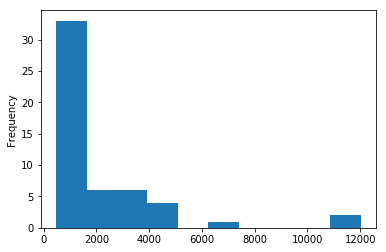

In [16]:
# create a new series with the mean gdp per cap for each country in africa
mean_gdp_country = africa.groupby('country')['gdp_per_cap'].mean()
mean_gdp_country.plot(kind='hist')

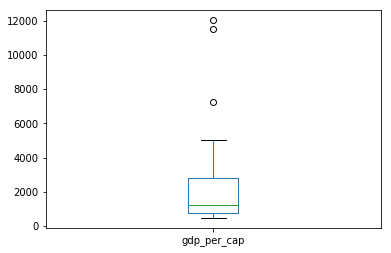

In [17]:
# create a boxplot
mean_gdp_country.plot(kind='box')

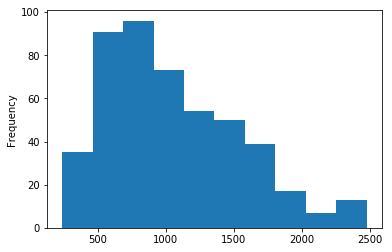

In [22]:
# Filter further with conditional logic
# create a DataFrame that cuts down the outliers
filt_africa = africa[africa.gdp_per_cap < 2500]
plot = filt_africa['gdp_per_cap'].plot(kind = 'hist')

In [37]:
# apply()
# create a category/bins and apply to gdp per cap

# start with a function
def func(x):
    if x <=500:
        return 'low'
    elif 500< x <1750:
        return 'mid'
    else:
        return 'high'

# apply the new function to each row in the DataFrame
africa['gdp_category'] = africa['gdp_per_cap'].apply(func)
africa.head()

/usr/local/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,country,continent,year,life_exp,pop,gdp_per_cap,gdp_category,new_categories
2,Gabon,Africa,1952.0,37.003,420702.0,4293.476475,high,high
4,Gambia,Africa,1952.0,30.000,284320.0,485.230659,low,low
6,Ghana,Africa,1952.0,43.149,5581001.0,911.298937,mid,mid
9,Guinea,Africa,1952.0,33.609,2664249.0,510.196492,mid,mid
10,Guinea-Bissau,Africa,1952.0,32.500,580653.0,299.850319,low,low


In [33]:
# we could also use the cut() function
bins = [0,500, 2750, 70000]
names = ['low', 'mid', 'high']
africa['new_categories'] = pd.cut(africa.loc[:,'gdp_per_cap'], bins, labels=names)
africa.head()

/usr/local/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,country,continent,year,life_exp,pop,gdp_per_cap,gdp_category,new_categories
2,Gabon,Africa,1952,37.003,420702,4293.476475,high,high
4,Gambia,Africa,1952,30.000,284320,485.230659,low,low
6,Ghana,Africa,1952,43.149,5581001,911.298937,mid,mid
9,Guinea,Africa,1952,33.609,2664249,510.196492,mid,mid
10,Guinea-Bissau,Africa,1952,32.500,580653,299.850319,low,low


# Misc.
---
## Create a Pandas DataFrame from a dictionary

In [ ]:
# create a dictionary object
my_dict = {'a':['cheese', 'dog', 'goat', '4h'], 'b':['lush','planet', '2017', 'la trance'] }

# create a pandas DataFrame from a dictionary
df = pd.DataFrame(my_dict)
df